In [100]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [101]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [102]:
torch.cuda.set_device(0)

In [103]:
PATH = 'data/seedlings2/'

In [104]:
sizes = [len(os.listdir(f'{PATH}train/{o}')) for o in os.listdir(f'{PATH}train')]
sizes

[184, 247, 331, 420, 142, 148, 318, 304, 250, 142, 169, 392]

In [105]:
val_idxs_by_folder = [get_cv_idxs(n) for n in sizes]

In [106]:
newlist = list(zip(os.listdir(f'{PATH}train'), val_idxs_by_folder))

In [107]:
val_fns = [(o[0], []) for o in newlist]

In [108]:
for i in range(len(val_fns)):
    for j in newlist[i][1]:
        val_fns[i][1].append(os.listdir(f'{PATH}train/{newlist[i][0]}')[j])

In [109]:
len(val_fns)

12

In [16]:
for o in val_fns:
    for i in o[1]:
        !mv '{PATH}train/{o[0]}/{i}' '{PATH}valid/{o[0]}'

In [110]:
arch = resnet34

In [111]:
sz = 224

In [112]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), test_name='test')

In [113]:
fn = PATH + data.trn_ds.fnames[1000]; fn

'data/seedlings2/train/Common wheat/cac003231.png'

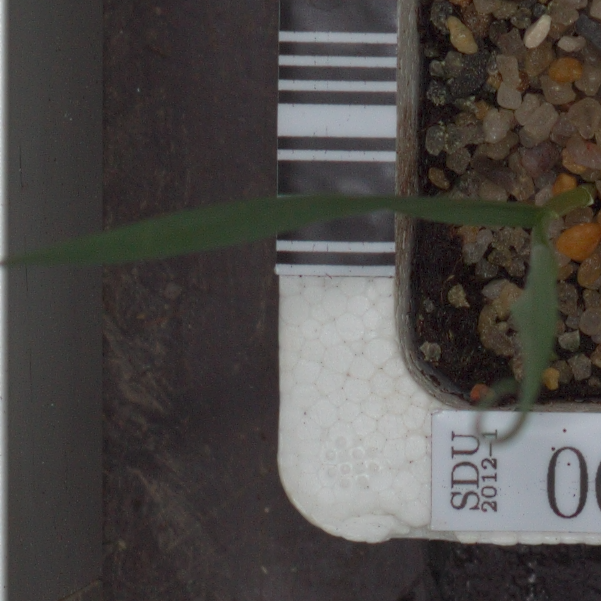

In [114]:
img = PIL.Image.open(fn); img

In [115]:
img.size

(601, 601)

In [116]:
size_dict = {}

In [117]:
for k in data.trn_ds.fnames:
    img = PIL.Image.open(PATH + k)
    size_dict.update({k: img.size})
    img.close()


In [119]:
row_sz, col_sz = list(zip(*size_dict.values()))

In [120]:
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

In [121]:
row_sz[:5]

array([ 505,   96,  195,  983, 1030])

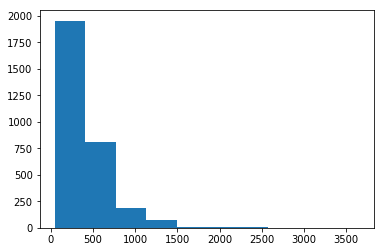

In [122]:
plt.hist(row_sz);

(array([797., 648., 238., 338., 304., 219., 153.,  96.,  56.,  53.]),
 array([ 49. , 143.4, 237.8, 332.2, 426.6, 521. , 615.4, 709.8, 804.2, 898.6, 993. ]),
 <a list of 10 Patch objects>)

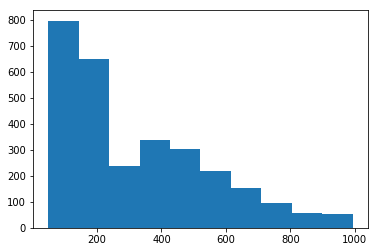

In [123]:
plt.hist(row_sz[row_sz < 1000])

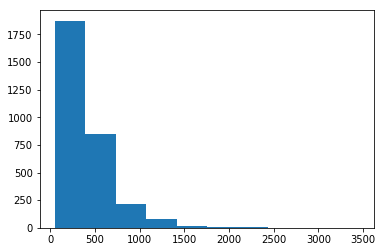

In [124]:
plt.hist(col_sz);

In [125]:
len(data.trn_ds), len(data.test_ds)

(3047, 794)

In [126]:
len(data.classes), data.classes[:5]

(12,
 ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat'])

In [153]:
bs = 58

In [176]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [177]:
lrf=learn.lr_find()

 67%|██████▋   | 32/48 [00:00<00:00, 32.21it/s, loss=2.63]


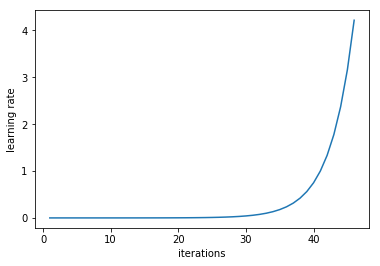

In [178]:
learn.sched.plot_lr()

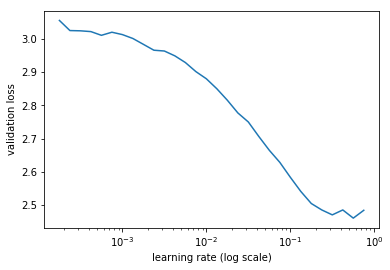

In [179]:
learn.sched.plot()

In [180]:
sz = 224
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_top_down, max_zoom=1.05) 

In [181]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1, test_name='test')
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [182]:
ims = np.stack([get_augs() for i in range(6)])

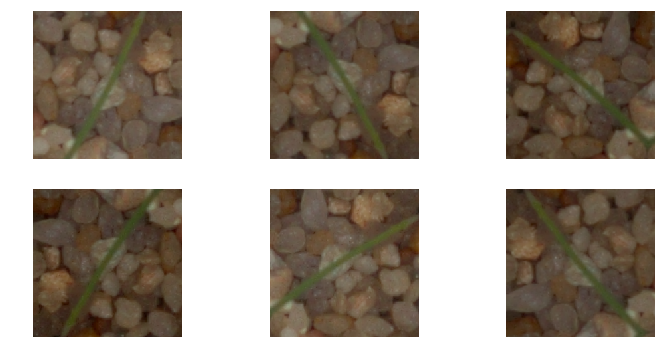

In [183]:
plots(ims, rows=2)

In [184]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms, test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [185]:
learn.fit(1e-1, 1)

epoch      trn_loss   val_loss   accuracy                  
    0      1.565642   1.113492   0.700528  



[1.1134919859140815, 0.7005284793994319]

In [186]:
learn.precompute=False

In [187]:
learn.fit(1e-1, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      1.215687   0.697466   0.77158   
    1      1.072708   0.646888   0.786847                  
    2      0.926399   0.578422   0.804463                  



[0.5784218348409593, 0.8044627130346583]

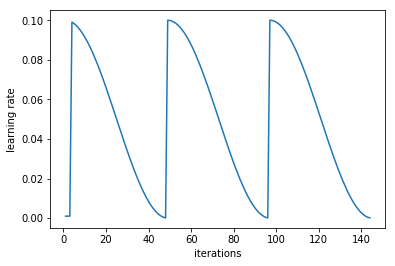

In [188]:
learn.sched.plot_lr()

In [189]:
learn.save('224_lastlayer')

In [190]:
learn.load('224_lastlayer')

In [191]:
learn.unfreeze()

In [192]:
lr=np.array([1e-4,1e-2,1e-1])

In [193]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.751837   0.337766   0.884322  
    1      0.510014   0.409525   0.860834                  
    2      0.330881   0.231534   0.921315                  
    3      0.295083   0.261503   0.914269                  
    4      0.232509   0.281446   0.923664                  
    5      0.172392   0.19027    0.941867                  
    6      0.140324   0.186241   0.93717                   



[0.18624140834517852, 0.9371697005984787]

In [195]:
data.test_ds.fnames[:20]

['test/79e5ea8fa.png',
 'test/3a909ead8.png',
 'test/599691cd9.png',
 'test/5ca2687a4.png',
 'test/3dd52bd2a.png',
 'test/1541bdb2e.png',
 'test/39d569be4.png',
 'test/3d65168c2.png',
 'test/995c7ab1e.png',
 'test/99569b224.png',
 'test/8d6acbe9b.png',
 'test/aee6fa3df.png',
 'test/5b63dcc21.png',
 'test/219fd68d5.png',
 'test/69d1669f8.png',
 'test/82b5f4d33.png',
 'test/35ebe165c.png',
 'test/aad8375e0.png',
 'test/1376f3b63.png',
 'test/728eabae1.png']

In [174]:
log_preds, y = learn.TTA(is_test=True)

In [140]:
probs = np.mean(np.exp(log_preds),0)

In [141]:
probs

array([[0.00439, 0.00189, 0.001  , ..., 0.     , 0.00003, 0.00013],
       [0.     , 0.     , 0.00001, ..., 0.     , 0.99999, 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.99998, 0.     ],
       ...,
       [0.00387, 0.00004, 0.00011, ..., 0.00001, 0.00005, 0.0004 ],
       [0.     , 0.     , 0.00008, ..., 0.00003, 0.     , 0.0002 ],
       [0.00002, 0.     , 0.00003, ..., 0.     , 0.     , 0.00859]], dtype=float32)

In [196]:
outs = np.argmax(probs, axis=1); outs[:20]

array([ 4, 10, 10,  7, 10,  7,  6,  3,  4,  4,  3,  6,  3,  8,  1,  9,  0,  9,  6,  1])

In [143]:
outs.shape

(794,)

In [146]:
classes = [data.classes[i] for i in outs]

In [147]:
df = pd.DataFrame({'species': classes}); df3.head()

,species
0,Common wheat
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Maize
4,Small-flowered Cranesbill


In [148]:
df.insert(0, 'file', [o[5:] for o in data.test_ds.fnames])

In [149]:
df.rename({'0' : 'species'})
df.head()

,file,species
0,79e5ea8fa.png,Common wheat
1,3a909ead8.png,Small-flowered Cranesbill
2,599691cd9.png,Small-flowered Cranesbill
3,5ca2687a4.png,Maize
4,3dd52bd2a.png,Small-flowered Cranesbill


In [150]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [151]:
FileLink(f'{SUBM}subm.gz')

/home/paperspace/fastai/courses/dl1/data/seedlings2/subm/subm.gz